In [72]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/globaldothealth/monkeypox/main/latest.csv")



/Users/kootsoop/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (12,14,18,21,24,25,29,34) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [73]:
entry_data = df['Date_entry']

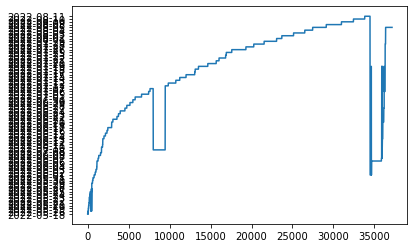

In [74]:
import matplotlib.pyplot as plt
plt.plot(entry_data)

(array([  404.,   665.,  1903.,  2154.,  1709.,  2872.,  4077.,  4888.,
         6913., 11564.]),
 array([ 0. ,  7.1, 14.2, 21.3, 28.4, 35.5, 42.6, 49.7, 56.8, 63.9, 71. ]),
 <BarContainer object of 10 artists>)

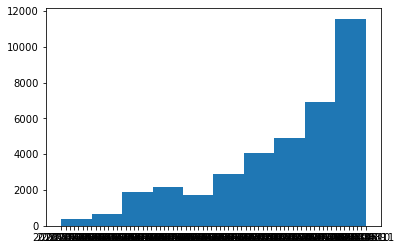

In [75]:
plt.hist(entry_data)

<AxesSubplot:xlabel='Date_entry,Date_entry,Date_entry'>

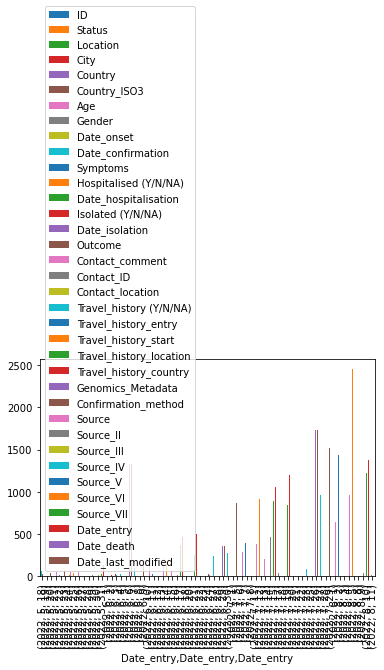

In [76]:
df["Date_entry"] = df["Date_entry"].astype("datetime64")
df.groupby([df["Date_entry"].dt.year, df["Date_entry"].dt.month, df["Date_entry"].dt.day]).count().plot(kind="bar")

In [77]:
USA_data = df.loc[df["Country_ISO3"] == "USA"]

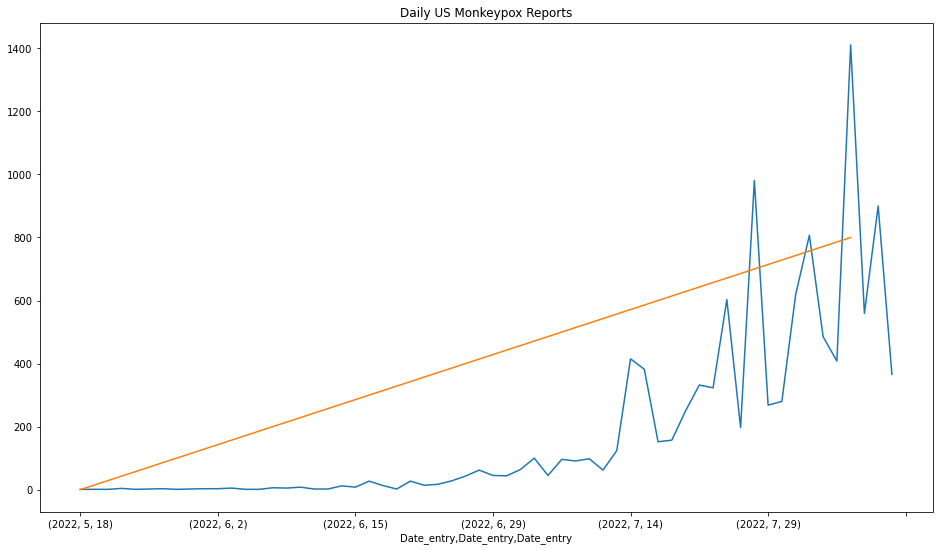

In [78]:
import numpy as np

plt.figure(figsize=(16,9))
counts = USA_data.groupby([USA_data["Date_entry"].dt.year, USA_data["Date_entry"].dt.month, USA_data["Date_entry"].dt.day])["Date_entry"].size()
us_plot = counts.plot(kind="line", title='Daily US Monkeypox Reports')
plt.plot([0,56],[0,800])


# numpy.polyfit(x, numpy.log(y), 1)

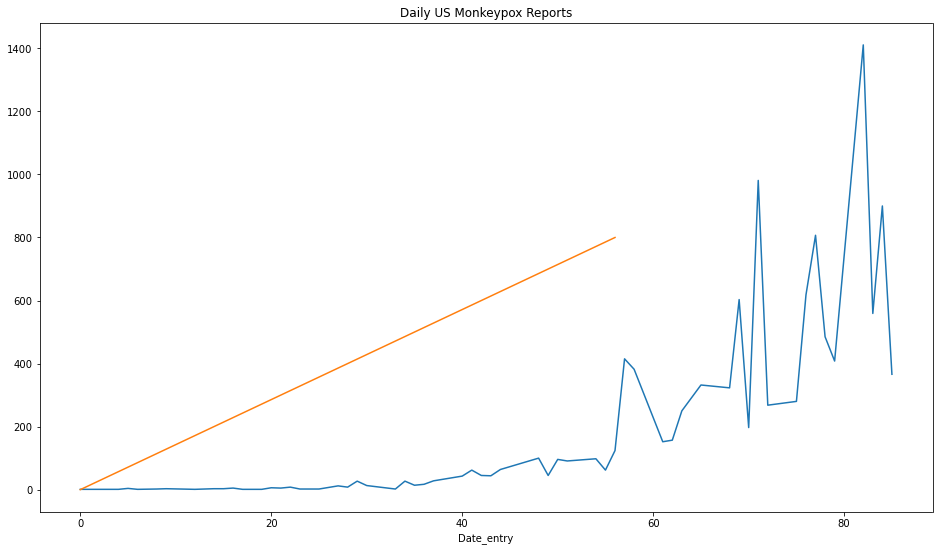

In [79]:
first_day = min(USA_data["Date_entry"].dt.dayofyear)
counts = USA_data.groupby([USA_data["Date_entry"].dt.dayofyear - first_day])["Date_entry"].size()
plt.figure(figsize=(16,9))
us_plot = counts.plot(kind="line", title='Daily US Monkeypox Reports')
plt.plot([0,56],[0,800])


In [80]:
index = counts.index.values.astype(float).astype(float)
values = counts.values.astype(float)
linear_fit_weighted = np.polyfit(index, np.log(values), 1, w=np.sqrt(values))
linear_fit = np.polyfit(index, np.log(values), 1)

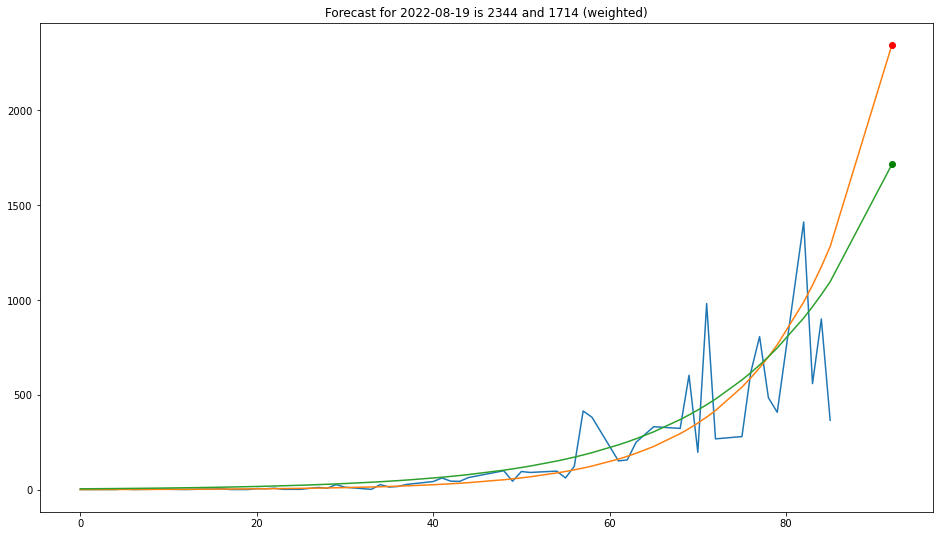

In [81]:
from datetime import datetime, timedelta

seven_days_from_today = datetime.today().date() + timedelta(days=7)

plt.figure(figsize=(16,9))
plt.plot(index, values)
one_week_from_now = np.append(index, max(index)+7.0)
one_week_forecast = np.exp(linear_fit[1])*np.exp(linear_fit[0]*one_week_from_now)
one_week_forecast_weighted = np.exp(linear_fit_weighted[1])*np.exp(linear_fit_weighted[0]*one_week_from_now)
plt.plot(one_week_from_now, one_week_forecast)
plt.plot(one_week_from_now, one_week_forecast_weighted)
plt.title('Forecast for ' + str(seven_days_from_today) + ' is ' + str(int(max(one_week_forecast))) + ' and ' + str(int(max(one_week_forecast_weighted))) + ' (weighted)' )
plt.plot(max(one_week_from_now), max(one_week_forecast), 'ro')
plt.plot(max(one_week_from_now), max(one_week_forecast_weighted), 'go')

In [82]:
from os import path
import json

FORECAST_FILE = 'forecasts_mokeypox.txt'
if (path.exists(FORECAST_FILE)):
    forecast_file = open(FORECAST_FILE, 'r')
    forecasts_mokeypox = json.load(forecast_file)
    forecast_file.close()
else:
    forecasts_mokeypox = {}

if (not str(seven_days_from_today) in forecasts_mokeypox):
    print("Updating file: " + FORECAST_FILE)
    forecasts_mokeypox.update({ str(seven_days_from_today) : str(int(max(one_week_forecast))) + ',' + str(int(max(one_week_forecast_weighted))) })
    forecast_file = open(FORECAST_FILE, 'w+')
    json.dump(forecasts_mokeypox, forecast_file)
    forecast_file.close()
    

Updating file: forecasts_mokeypox.txt


In [83]:
forecast_date = forecasts_mokeypox.keys()
forecasts = forecasts_mokeypox.values()

first_forecasts = [ int(x.split(",")[0])  for x in forecasts]

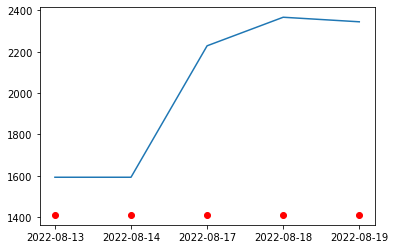

In [84]:
ix = np.argmax(values)
plt.plot(forecast_date, values[ix]*np.ones(len(forecast_date)), 'ro')
plt.plot(forecast_date, first_forecasts)


In [85]:
print(forecasts_mokeypox)

{'2022-08-13': '1593,1368', '2022-08-14': '1593,1368', '2022-08-17': '2228,1780', '2022-08-18': '2366,1794', '2022-08-19': '2344,1714'}
